In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
from astropy.io import ascii

In [2]:
def deg_to_sex(ra, dec):
    c = SkyCoord(ra = ra*u.degree, dec = dec*u.degree)
    print('RA: {0}\ndec: {1}'.format(c.ra.hms, c.dec.dms))

In [3]:
image3 = 'data/PAL5/PAL5__e1/PAL5__e1_3p6um.fits'
image4 = 'data/PAL5/PAL5__e1/PAL5__e1_4p5um.fits'

with fits.open(image3) as hdul:
    data3 = hdul[0].data
    hdr3 = hdul[0].header
    
with fits.open(image4) as hdul:
    data4 = hdul[0].data
    hdr4 = hdul[0].header

In [4]:
filename3 = 'outputs/e1_3p6.txt'
filename4 = 'outputs/e1_4p5.txt'

file3 = ascii.read(filename3, delimiter=',')
file4 = ascii.read(filename4, delimiter=',')
print(file3)
print(file3[:][246])
print(file4[:][239])

#plt.plot(file_ap['apparent_mag_median'], file_psf['apparent_mag'][:1036])

 id  xcenter   ycenter  apparent_mag_median
--- --------- --------- -------------------
  1 1335.7201 23.327156                 nan
  2  1017.072 24.456139                 nan
  3 1325.4233 24.020858                 nan
  4 1267.5653 27.531396           17.188494
  5 1138.3723 28.990912            16.84821
  6  1300.237 29.593042           16.491523
  7 722.22393 37.943258                 nan
  8 797.63943 39.455565                 nan
  9 910.48561  40.64482           17.511316
 10 1150.0528 41.601753           15.136903
...       ...       ...                 ...
587 1144.7378 653.51864                 nan
588  186.0682 654.73342           18.169397
589 1036.0708 653.70605                 nan
590 980.18034 655.72281                 nan
591 370.13387 660.44529           17.134511
592 419.57363 664.80689             16.6271
593  282.3413 666.48873            17.74012
594 410.61334 668.12726           16.011201
595 538.22026 667.98723                 nan
596 137.39183 668.73458         

In [5]:
x3 = file3['xcenter']
y3 = file3['ycenter']
x4 = file4['xcenter']
y4 = file4['ycenter']

#plt.plot(x4, y4, 'b+', lw=0.15, markersize=8)
#plt.plot(x3, y3, 'r.')
#plt.gcf().set_size_inches(10, 6)

In [6]:
#coords_ap = SkyCoord(ra = x_ap, dec = y_ap)

In [7]:
w3 = wcs.WCS(hdr3)
w4 = wcs.WCS(hdr4)
print(w3, w4)
#w.wcs.print_contents()

crd3 = np.transpose((x3, y3))
crd4 = np.transpose((x4, y4))
world3 = w3.wcs_pix2world(crd3, 0)
world4 = w4.wcs_pix2world(crd4, 0)

#print(world_ap, world_psf)

ra3 = world3[:,0]
dec3 = world3[:,1]
ra4 = world4[:,0]
dec4 = world4[:,1]

# checking a star known to be detected in both channels has the correct coordinates:
print(ra3[246], dec3[246])
print(ra4[239], dec4[239])
deg_to_sex(ra3[246], dec3[246])
deg_to_sex(ra4[239], dec4[239])

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 229.025811  -0.055425  
CRPIX : 707.123426  348.040937  
CD1_1 CD1_2  : -2.7239819090855e-05  -0.000164428954736985  
CD2_1 CD2_2  : -0.000164428954736985  2.7239819090855e-05  
NAXIS : 1413  695 WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 229.01073  -0.167517  
CRPIX : 704.554985  346.90351  
CD1_1 CD1_2  : -2.76759076885448e-05  -0.000164356116508073  
CD2_1 CD2_2  : -0.000164356116508073  2.76759076885448e-05  
NAXIS : 1408  693
229.03231956662157 -0.06762673179030487
229.03235691606577 -0.06769092671708603
RA: hms_tuple(h=15.0, m=16.0, s=7.756695989184124)
dec: dms_tuple(d=-0.0, m=-4.0, s=-3.4562344450975147)
RA: hms_tuple(h=15.0, m=16.0, s=7.765659855793103)
dec: dms_tuple(d=-0.0, m=-4.0, s=-3.6873361815097105)


In [8]:
c3 = SkyCoord(ra3, dec3, frame='icrs', unit='deg')
c4 = SkyCoord(ra4, dec4, frame='icrs', unit='deg')
#print(len(c3), len(c4))

idx, d2d, d3d = c4.match_to_catalog_sky(c3)
#print(idx, d2d, d3d)
#print(len(idx))
#print(d2d)

data3_new = file3.copy()
data4_new = file4.copy()
#print(data3_new, data3_new['xcenter'])
data3_new['ra'] = ra3
data3_new['dec'] = dec3
data4_new['ra'] = ra4
data4_new['dec'] = dec4
#print(data3_new['ra'])

radius = 1. * u.arcsec
selection = (d2d > radius)
match_index = idx
match_index[selection] = -99.
ind = ((match_index >= 0))  # removes -99 indices
#print(ind)
print('Number of common stars: {}'.format(sum(ind)))

mag3 = data3_new['apparent_mag_median'][match_index][ind]
mag4 = data4_new['apparent_mag_median'][ind]
delta_mag = data3_new['apparent_mag_median'][match_index][ind] - data4_new['apparent_mag_median'][ind]

Number of common stars: 216


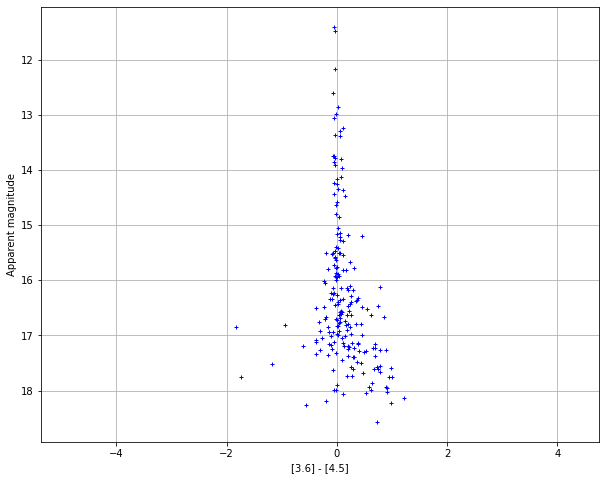

In [11]:
plt.plot(delta_mag, mag3, 'b+', label='3.6 um', markersize=4)
#plt.plot(delta_mag, mag4, 'rx', label='4.5 um', markersize=4)
plt.ylabel('Apparent magnitude')
plt.xlabel('[3.6] - [4.5]')
#plt.legend()
plt.grid()
plt.axis('equal')
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(10, 8)

#print(mag3[69], mag4[69], delta_mag[69])

with 0.6x0.6 arcsec pixels, 6 pix (i.e. aperture radius) = 3.6 arcsec = 0.001 deg:

(definitely don't want to use this for max separation tho; since psf and ap phot both use ap phot to detect stars, the centroid coords should hopefully be identical, or at least very very close)

In [11]:
x = 3.6 * u.arcsec
x.to(u.deg)

<Quantity 0.001 deg>

In [12]:
#max_sep = 0.0001 * u.deg
constraint = d2d < radius
c4_matches = c4[constraint]
c3_matches = c3[idx[constraint]]

print(len(c3_matches))
print(len(c4_matches))
#print(c3_matches)
#print(c4_matches)

216
216


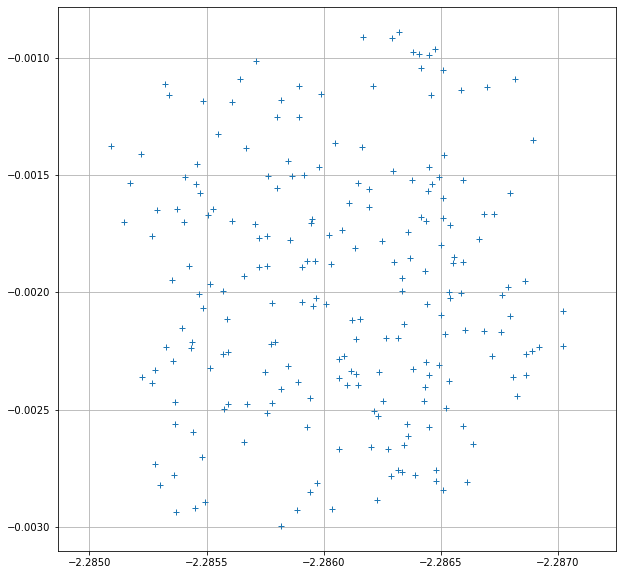

In [13]:
ra_rad = c3_matches.ra.wrap_at(180 * u.deg).radian  # can also use c4_matches as they're identical
dec_rad = c3_matches.dec.radian
#print(ra_rad)

#plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.axis('equal')
plt.gca().invert_xaxis()
plt.plot(ra_rad, dec_rad, '+', markersize=6)
plt.gcf().set_size_inches(10, 10)